<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/loading-imagenames-and-images/Tomato1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from google.colab import drive
import zipfile
import os
import shutil

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract the dataset zip file
dataset_name = 'PlantVillage'
drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/'
working_dataset_address = os.path.join('/tmp/', dataset_name)

zip_ref = zipfile.ZipFile(drive_dataset_address + dataset_name + '.zip', 'r')
zip_ref.extractall('/tmp/') # Extracts the files into the appropriate folder
zip_ref.close()

In [ ]:
# Removes the __MACOSX file that comes with zipping a file on Mac
try:
  shutil.rmtree('/tmp/__MACOSX')
except:
  pass

In [ ]:
# Function to extract all sub- file/directory names
def read_filenames(dir_path, file_bool = True):
  if file_bool: # list all files in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isfile(os.path.join(dir_path, f))]
  if not file_bool: # list all subfolders in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isdir(os.path.join(dir_path, f))]


In [ ]:
# getting classes
classes = read_filenames(working_dataset_address,file_bool = False)
classes

['Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Septoria_leaf_spot']

In [ ]:
# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

In [ ]:
# Collect all image names

img_names = [read_filenames(os.path.join(working_dataset_address, classes[i])) for i in range(CLASS_SIZE)]

# Row length should be the number of classes
print("Row Length", len(img_names))

# collect each column length
row_lengths = []
for i in range(CLASS_SIZE):
  row_lengths.append(len(img_names[i]))

print("Column length", row_lengths)

Row Length 10
Column length [1676, 2127, 952, 1000, 1591, 1404, 373, 1909, 3209, 1771]


In [ ]:
# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray

img_path = os.path.join(working_dataset_address, classes[0], img_names[0][0])

image = Image.open(img_path)

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(256, 256)
RGB


In [ ]:
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image1 = Image.fromarray(data)
print(type(image1))

# summarize image details
print(image1.mode)
print(image1.size)

<class 'numpy.ndarray'>
(256, 256, 3)
<class 'PIL.Image.Image'>
RGB
(256, 256)


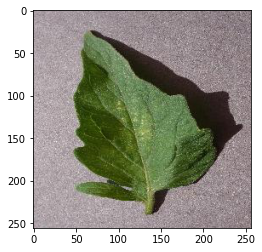

In [ ]:
plt.imshow(data)
plt.show()

In [ ]:
# making a np array of the images in pizel values
x = []
y = []

for i in range(CLASS_SIZE):
  for j in range(len(img_names[i])):
    img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
    try:
      img = Image.open(img_path)
      data = asarray(img) # convert image to numpy array
      x.append(data)
      y.append(classes[i])
    except:
      pass

image_count = len(x)
print("Total image count:", image_count)
x = np.asarray(x)
y = np.asarray(y)
print(type(x))

Total image count: 16011
<class 'numpy.ndarray'>


Tomato_Septoria_leaf_spot
Tomato_Septoria_leaf_spot


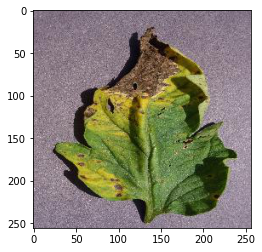

In [ ]:
print(classes[9])
print(y[16010])
plt.imshow(x[16010])
plt.show()

In [ ]:
# Now we need to split the data into a training and a validating dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [ ]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12808, 256, 256, 3)
x_test shape: (3203, 256, 256, 3)
y_train shape: (12808,)
y_test shape: (3203,)


In [ ]:
# # COMMENTED OUT - PAST METHOD

# img = tf.keras.preprocessing.image.load_img(img_path)
# images = tf.keras.preprocessing.image.img_to_array(img)
# images.shape

# images = []

# for i in range(CLASS_SIZE):
#   for j in range(len(img_names[i])):
#     img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
#     try:
#       img = tf.keras.preprocessing.image.load_img(img_path)
#       images.append(img)
#     except:
#       pass
#       # print(i, j)

# image_count = len(images)
# print(image_count)
# type(images)

# Read the images into a list
# import cv2

# images=np.empty([16012,256,256,3])

# for i in range(CLASS_SIZE):
#   for j in range(len(img_names[i])):
#     img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
#     try:
#       img = cv2.imread(img_path)
#       images.append(img)
#       # img = tf.keras.preprocessing.image.load_img(img_path)
#       # images.append(tf.keras.preprocessing.image.img_to_array(img))
#     except:
#       pass
#       # print(i, j)

# image_count = len(images)
# print(image_count)
# type(images)